[문화 빅데이터] - 관광 소비행태 데이터_카드사 음식 급상승 데이터

https://www.culture.go.kr/bigdata/user/data_market/detail.do?id=f0306b70-597a-11ec-8ee4-95f65f846b27

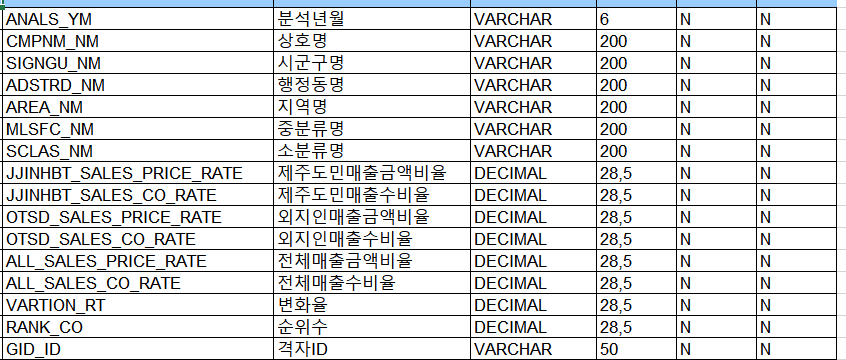

# 목표

### 가설보다는 3년간의 등락 변화 보여주기

In [1]:
!pip install google-cloud-bigquery google-auth db-dtypes

Defaulting to user installation because normal site-packages is not writeable


In [33]:
from google.oauth2 import service_account

credentials = service_account.Credentials.from_service_account_file("./bigquery_service_account_2.json")

credentials

In [34]:
from google.cloud import bigquery

client = bigquery.Client(
    credentials = credentials,
    project = credentials.project_id
)

In [35]:
sql= '''
SELECT 
    *
FROM 
    `vivid-gantry-404708.project_011.card_transaction_2107`
'''

In [7]:
df = client.query(sql).to_dataframe()
df

,ANALS_YM,CMPNM_NM,SIGNGU_NM,ADSTRD_NM,AREA_NM,MLSFC_NM,SCLAS_NM,JJINHBT_SALES_PRICE_RATE,JJINHBT_SALES_CO_RATE,OTSD_SALES_PRICE_RATE,OTSD_SALES_CO_RATE,ALL_SALES_PRICE_RATE,ALL_SALES_CO_RATE,VARTION_RT,RANK_CO,GID_ID
0,202107,공차,제주시,연동,제주시 동지역,음료,차,0.84,3.83,0.03,0.53,0.07,1.21,-0.40,16070,다다06a00a
1,202107,공차제주연동신시가지점,제주시,연동,제주시 동지역,음료,차,0.96,4.81,0.01,0.25,0.06,1.15,-0.31,15758,다나06a99a
2,202107,지유명차,제주시,연동,제주시 동지역,음료,차,0.38,0.05,0.00,0.00,0.02,0.01,-0.02,8603,다나07a99a
3,202107,공차 제주탑동점,제주시,건입동,제주시 동지역,음료,차,0.68,2.84,0.01,0.15,0.05,0.68,-0.15,14302,다다09a03a
4,202107,공차한라대점,제주시,노형동,제주시 동지역,음료,차,0.61,2.50,0.01,0.15,0.04,0.61,-0.22,15177,다나04b99a
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14267,202107,(주)아워홈 제주국제공항2지점,제주시,용담2동,제주시 동지역,한식,구내식당/푸드코트,1.79,7.96,0.43,6.74,0.50,7.61,-1.76,16709,다다06a02a
14268,202107,(주)신세계푸드 한국공항공사 제주지역본부 직원식당,제주시,용담2동,제주시 동지역,한식,구내식당/푸드코트,0.03,0.21,0.01,0.01,0.01,0.05,-0.05,11155,다다06a02a
14269,202107,(주)아워홈 제주지방합동청사제주점,제주시,이도2동,제주시 동지역,한식,구내식당/푸드코트,1.76,7.33,0.03,0.42,0.13,1.79,-0.34,15845,다다09a00a
14270,202107,(주) 아워홈 제주지방합동청사점,제주시,이도2동,제주시 동지역,한식,구내식당/푸드코트,0.90,6.70,0.02,0.54,0.07,1.78,-0.52,16281,다다09a00a


# 전 월 대비 매출비율 음식점 탑 30

### 21년 5월  (바레이스 사용해보기)

In [20]:

sql = """
SELECT
  CMPNM_NM AS name,
  MLSFC_NM AS type,
  ALL_SALES_PRICE_RATE AS sr
FROM
  `vivid-gantry-404708.project_011.card_transaction_2105`
ORDER BY
  3 DESC
LIMIT
  30
"""


In [21]:
df = client.query(sql).to_dataframe()

In [10]:
import seaborn as sns 
from matplotlib import pyplot as plt

[Text(0.5, 1.0, '전월 대비 인기 급상승 음식점(21.05)')]

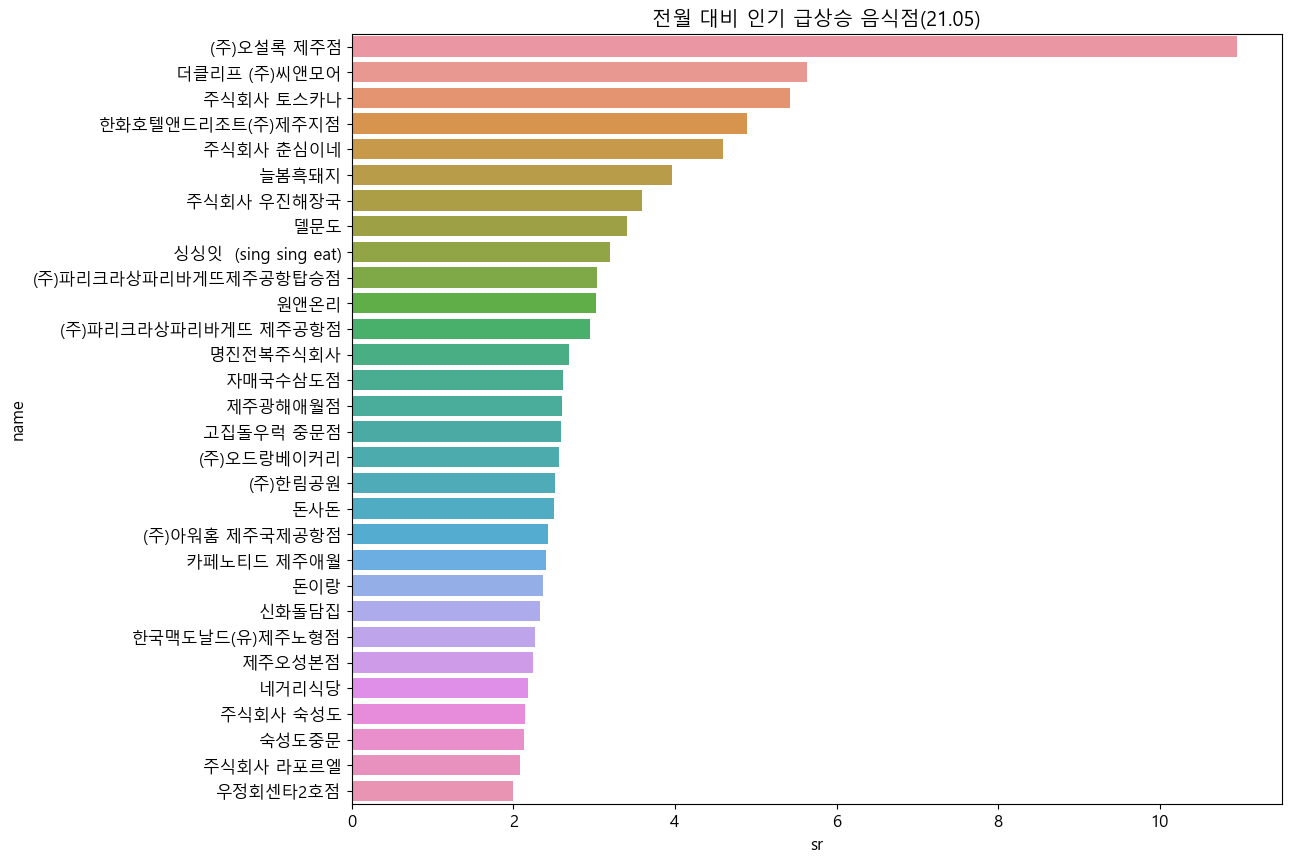

In [22]:


plt.rcParams['figure.figsize'] = (12, 10)
plt.rc("font", family = "Malgun Gothic", size=12, style="oblique")

sns.barplot(
    x="sr", 
    y="name", 
    data=df,
    width=0.8
).set(
    title="전월 대비 인기 급상승 음식점(21.05)"
)

In [34]:
sql = """
SELECT
  CMPNM_NM AS name,
  MLSFC_NM AS type,
  ALL_SALES_PRICE_RATE AS sr
FROM
  `vivid-gantry-404708.project_011.card_transaction_2105`
ORDER BY
  3 DESC
LIMIT
  30
OFFSET
  15
"""

In [35]:
df = client.query(sql).to_dataframe()

[Text(0.5, 1.0, '전월 대비 인기 급상승 음식점(21.05)')]

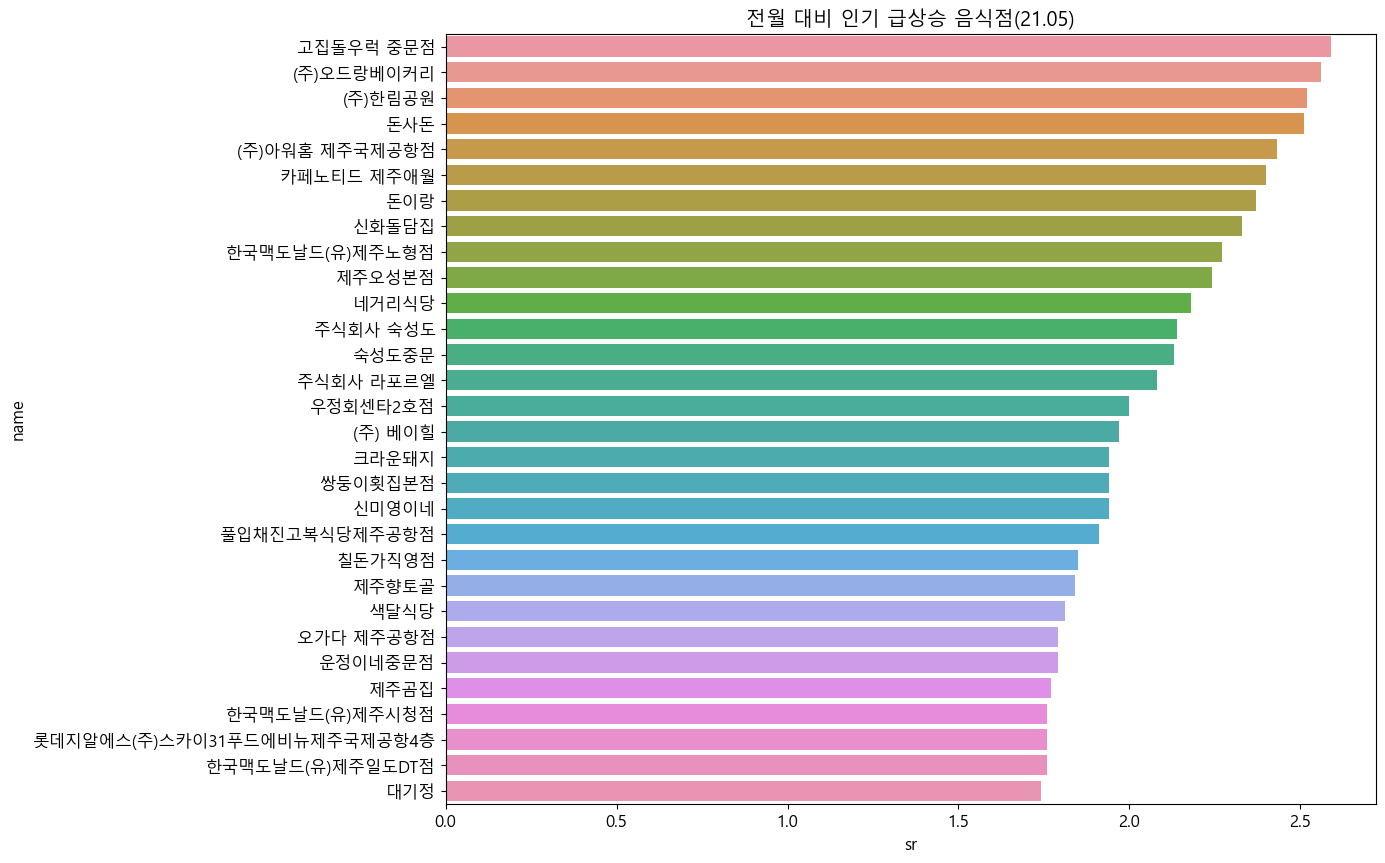

In [36]:
sns.barplot(
    x="sr", 
    y="name", 
    data=df,
    width=0.8
).set(
    title="전월 대비 인기 급상승 음식점(21.05)"
)

### 22년도 5월

In [55]:

sql = """
SELECT
  CMPNM_NM AS name,
  MLSFC_NM AS type,
  ALL_SALES_PRICE_RATE AS sr
FROM
  `vivid-gantry-404708.project_011.card_transaction_2205`
ORDER BY
  3 DESC
LIMIT
  30
"""


In [56]:
df = client.query(sql).to_dataframe()

[Text(0.5, 1.0, '전월 대비 인기 급상승 음식점(22.05)')]

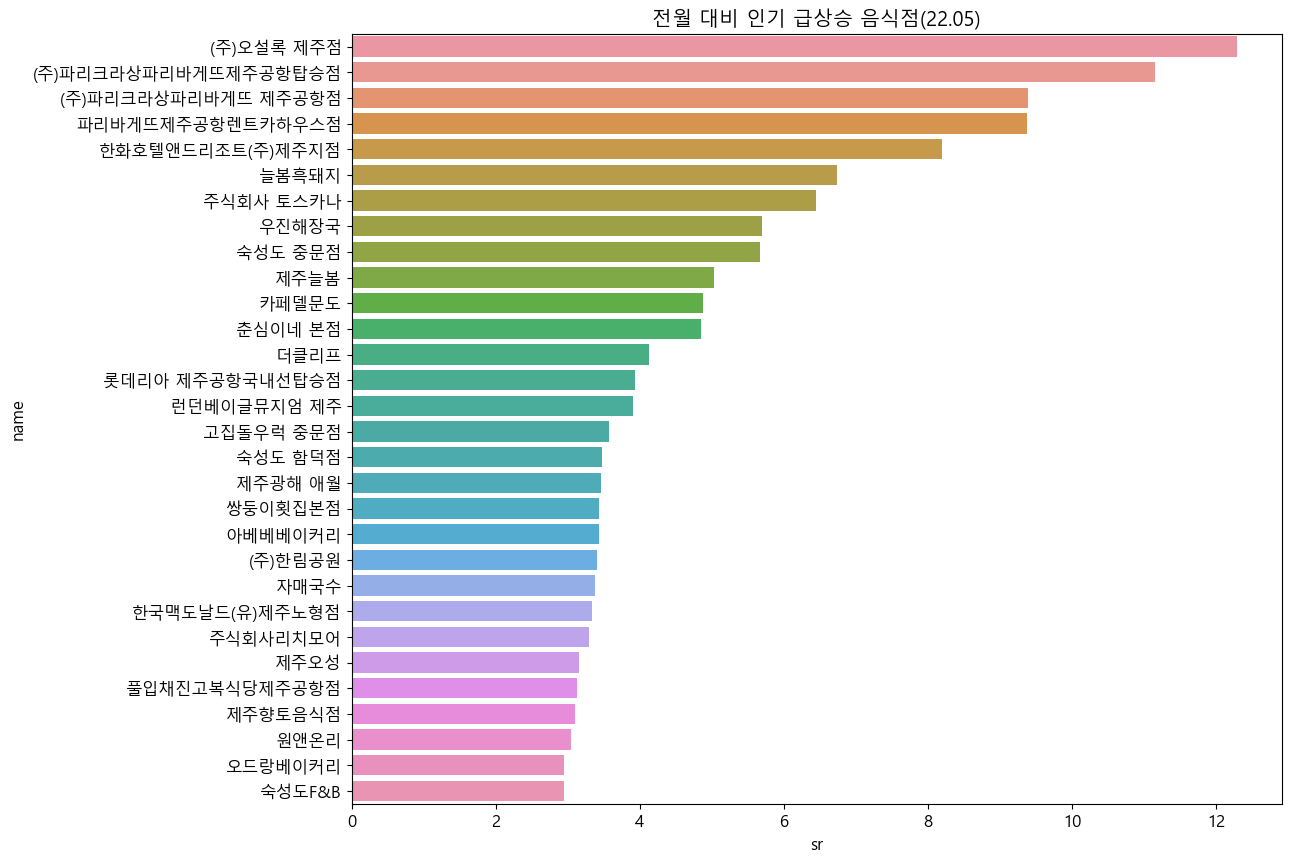

In [62]:

plt.rcParams['figure.figsize'] = (12, 10)
plt.rc("font", family = "Malgun Gothic", size=12, style="oblique")

sns.barplot(
    x="sr", 
    y="name", 
    data=df,
    width=0.8
).set(
    title="전월 대비 인기 급상승 음식점(22.05)"
)

### 23년 5월

In [63]:

sql = """
SELECT
  CMPNM_NM AS name,
  MLSFC_NM AS type,
  ALL_SALES_PRICE_RATE AS sr
FROM
  `vivid-gantry-404708.project_011.card_transaction_2305`
ORDER BY
  3 DESC
LIMIT
  30
"""

In [64]:
df = client.query(sql).to_dataframe()

[Text(0.5, 1.0, '전월 대비 인기 급상승 음식점(23.05)')]

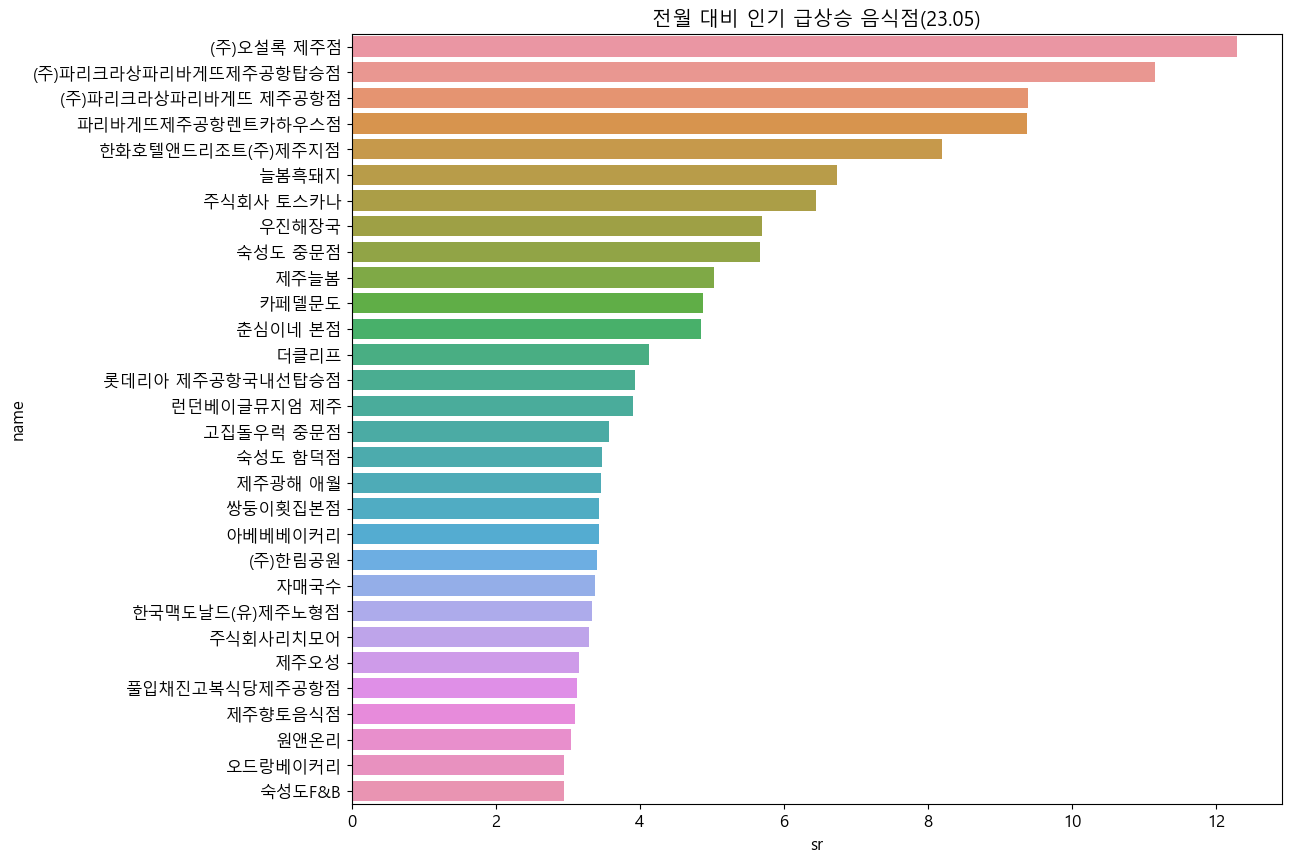

In [65]:
sns.barplot(
    x="sr", 
    y="name", 
    data=df,
    width=0.8
).set(
    title="전월 대비 인기 급상승 음식점(23.05)"
)

# pick

In [87]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  CMPNM_NM AS name,
  ROUND(SUM(ALL_SALES_PRICE_RATE)) AS sr
FROM
  `vivid-gantry-404708.project_011.card_transaction_21*`
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT 
  10
'''

In [88]:
df = client.query(sql).to_dataframe()
df

,year,name,sr
0,2021,(주)오설록 제주점,119.0
1,2021,주식회사 토스카나,58.0
2,2021,늘봄흑돼지,52.0
3,2021,주식회사 춘심이네,51.0
4,2021,한화호텔앤드리조트(주)제주지점,49.0
5,2021,더클리프 (주)씨앤모어,48.0
6,2021,주식회사 우진해장국,44.0
7,2021,(주)파리크라상파리바게뜨 제주공항점,44.0
8,2021,(주)파리크라상파리바게뜨제주공항탑승점,41.0
9,2021,델문도,39.0


<Axes: title={'center': '< 21년도 전월 대비 매출 급상승 음식점 top10 >'}, xlabel='sr', ylabel='name'>

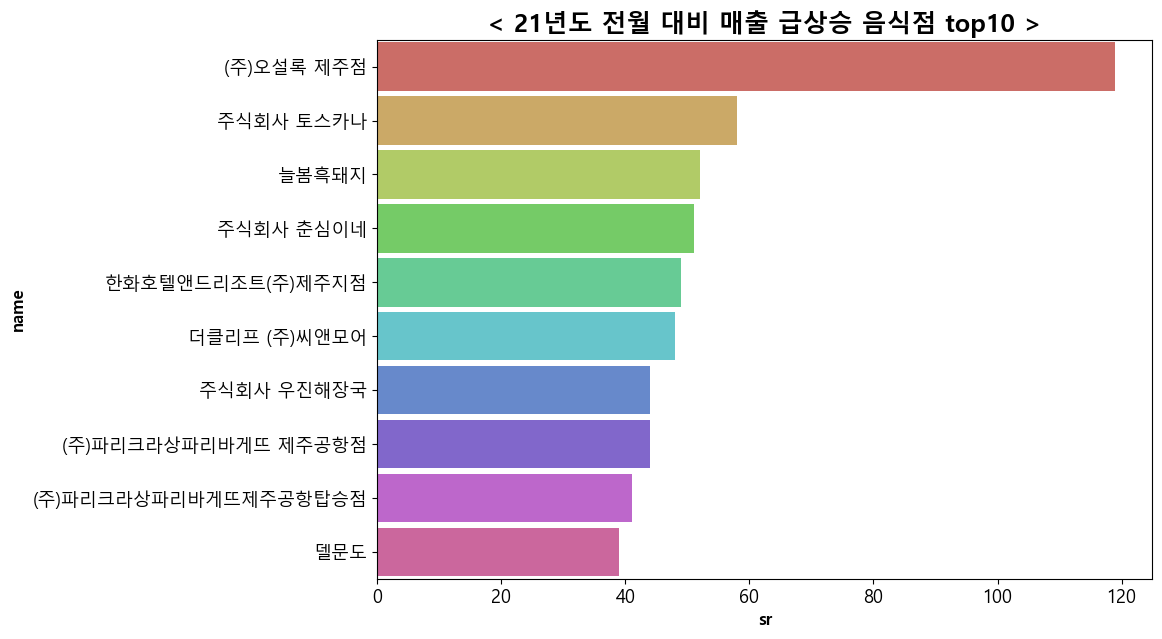

In [114]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21년도 전월 대비 매출 급상승 음식점 top10 >", fontsize=18, weight='bold')
plt.xlabel('sr', fontsize=12, weight='bold')
plt.ylabel('name', fontsize=12, weight='bold')


sns.barplot(
    x="sr", 
    y="name",
    data=df,
    width=0.9,
    palette="hls"
)

In [118]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  CMPNM_NM AS name,
  ROUND(SUM(ALL_SALES_PRICE_RATE)) AS sr
FROM
  `vivid-gantry-404708.project_011.card_transaction_22*`
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT 
  10
'''

In [119]:
df = client.query(sql).to_dataframe()

<Axes: title={'center': '< 22년도 전월 대비 매출 급상승 음식점 top10 >'}, xlabel='sr', ylabel='name'>

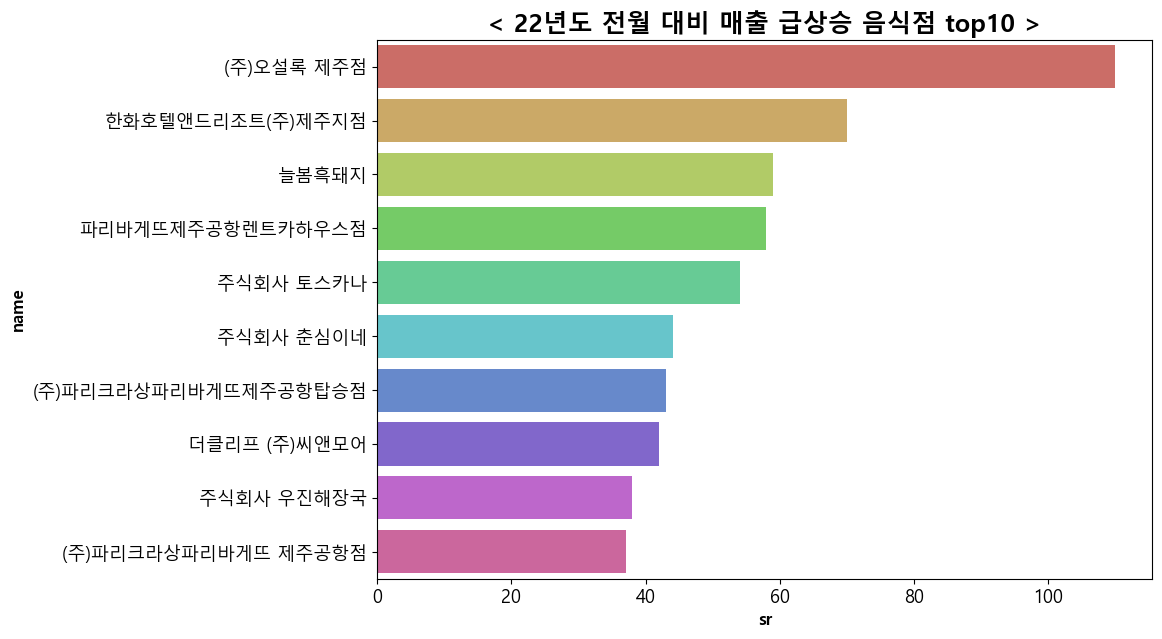

In [122]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 22년도 전월 대비 매출 급상승 음식점 top10 >", fontsize=18, weight='bold')
plt.xlabel('sr', fontsize=12, weight='bold')
plt.ylabel('name', fontsize=12, weight='bold')

sns.barplot(
    x="sr", 
    y="name",
    data=df,
    width=0.8,
    palette="hls"
)

In [128]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  CMPNM_NM AS name,
  ROUND(SUM(ALL_SALES_PRICE_RATE)) AS sr
FROM
  `vivid-gantry-404708.project_011.card_transaction_23*`
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT 
  10
'''

In [129]:
df = client.query(sql).to_dataframe()

<Axes: title={'center': '< 23년도 전월 대비 매출 급상승 음식점 top10 >'}, xlabel='sr', ylabel='name'>

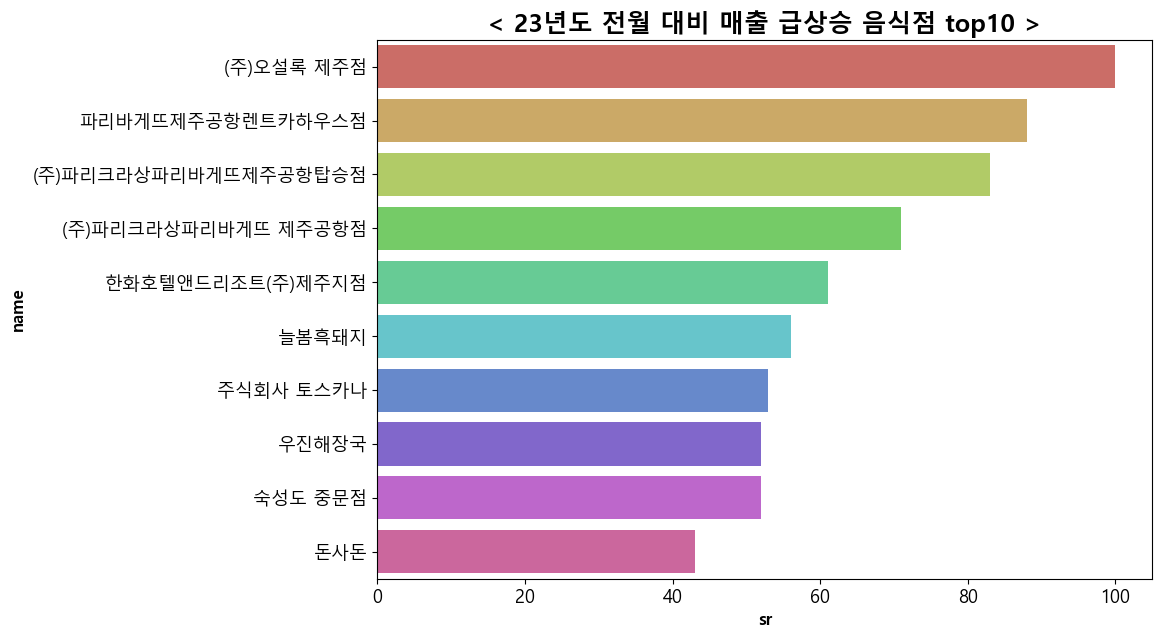

In [130]:
plt.rcParams['figure.figsize'] = (10, 7)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 23년도 전월 대비 매출 급상승 음식점 top10 >", fontsize=18, weight='bold')
plt.xlabel('sr', fontsize=12, weight='bold')
plt.ylabel('name', fontsize=12, weight='bold')



sns.barplot(
    x="sr", 
    y="name",
    data=df,
    width=0.8,
    palette="hls"
)

In [336]:
sql='''
SELECT	
  CMPNM_NM AS name,
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  ALL_SALES_PRICE_RATE AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE 
  CMPNM_NM IN ('(주)오설록 제주점')
GROUP BY 
  1,2,3,4
ORDER BY
  4 DESC
'''

In [337]:
df = client.query(sql).to_dataframe()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': '< 21~23년 오설록 월별 매출비율 변화 >'}, xlabel='month', ylabel='sales'>

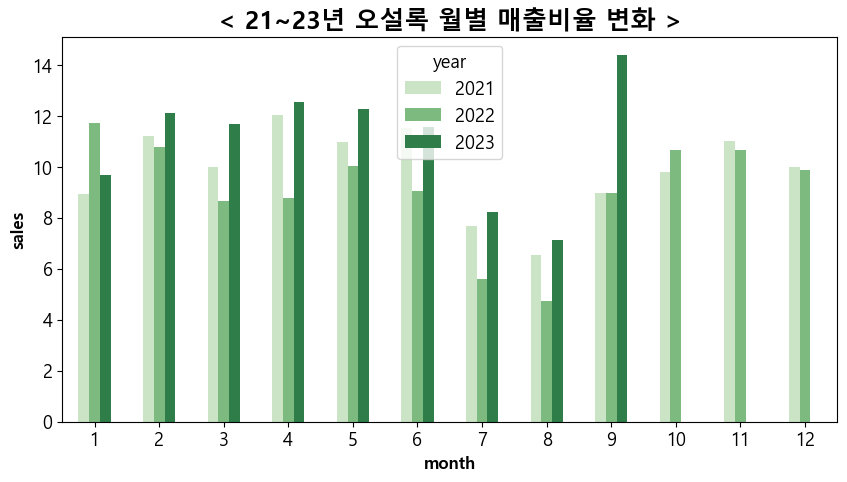

In [338]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21~23년 오설록 월별 매출비율 변화 >", fontsize=18, weight='bold')
plt.xlabel('sr', fontsize=12, weight='bold')
plt.ylabel('name', fontsize=12, weight='bold')

plt.legend(loc = 'upper right')

sns.barplot(
    data=df,
    x="month", 
    y="sales", 
    hue='year',
    width=0.5,
    palette="Greens"
    
)

In [342]:
sql = '''
SELECT	
  CMPNM_NM AS name,
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  OTSD_SALES_PRICE_RATE AS tour_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE 
  CMPNM_NM IN ('(주)오설록 제주점')
GROUP BY 
  1,2,3,4
ORDER BY
  4 DESC
'''

In [343]:
df = client.query(sql).to_dataframe()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: title={'center': '< 21~23년 오설록 월별 외지인 매출비율 변화 >'}, xlabel='month', ylabel='tour_sales'>

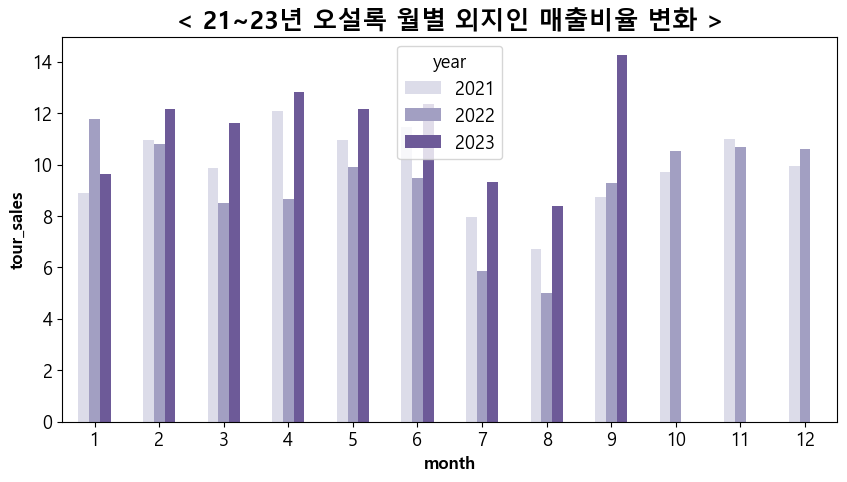

In [345]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21~23년 오설록 월별 외지인 매출비율 변화 >", fontsize=18, weight='bold')
plt.xlabel('sr', fontsize=12, weight='bold')
plt.ylabel('name', fontsize=12, weight='bold')

plt.legend(loc = 'upper right')

sns.barplot(
    data=df,
    x="month", 
    y="tour_sales", 
    hue='year',
    width=0.5,
    palette="Purples"
    
)

In [ ]:
sql = '''
SELECT	
  CMPNM_NM AS name,
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  JJINHBT_SALES_PRICE_RATE AS local_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE 
  CMPNM_NM IN ('(주)오설록 제주점')
GROUP BY 
  1,2,3,4
ORDER BY
  4 DESC
'''

# 한 해에 가장 방문율 높았던 음식점 업종 순위

### 22년도

In [152]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  MLSFC_NM AS type,
  COUNT(*) AS cnt
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE
  MLSFC_NM IN ('한식', '간식', '음료', '아시아음식', '패스트푸드')
GROUP BY
  2,1
ORDER BY
  3 DESC
'''

In [153]:
df = client.query(sql).to_dataframe()
df

,year,type,cnt
0,2021,한식,120442
1,2022,한식,111620
2,2023,한식,91349
3,2021,간식,10845
4,2021,음료,9418
5,2021,아시아음식,9127
6,2021,패스트푸드,9104
7,2022,간식,9066
8,2022,음료,8303
9,2023,음료,8235


<Axes: title={'center': '< 연도별 음식점 업종 top5 방문율 >'}, xlabel='type', ylabel='cnt'>

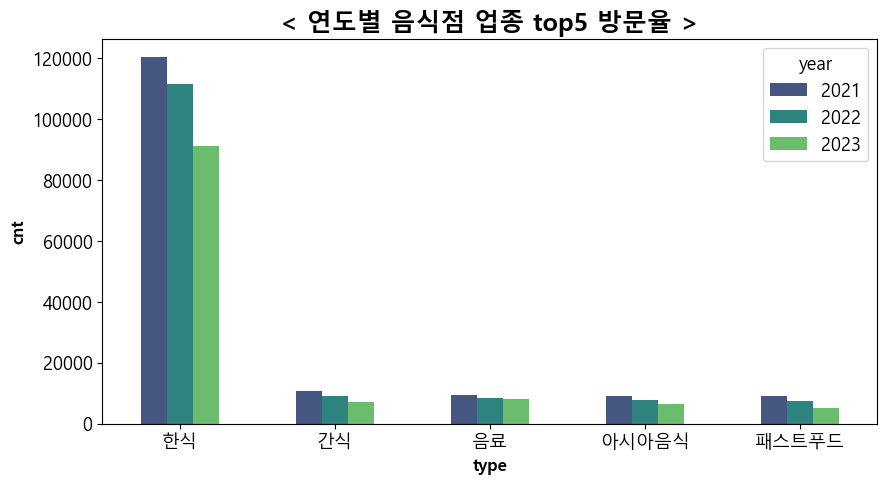

In [166]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 연도별 음식점 업종 top5 방문율 >", fontsize=18, weight='bold')
plt.xlabel('sr', fontsize=12, weight='bold')
plt.ylabel('name', fontsize=12, weight='bold')

sns.barplot(
    x="type", 
    y="cnt", 
    hue="year",
    data=df,
    width=0.5,
    palette="viridis"
)

In [238]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  ADSTRD_NM AS region,
  ROUND(SUM(ALL_SALES_PRICE_RATE)) AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE 
    ADSTRD_NM != '0'
GROUP BY
  1,2
ORDER BY
  1,3 DESC
'''

In [239]:
df = client.query(sql).to_dataframe()
df

,year,region,sales
0,2021,노형동,1467.0
1,2021,연동,1349.0
2,2021,애월읍,1205.0
3,2021,이도2동,1154.0
4,2021,안덕면,821.0
...,...,...,...
123,2023,이호동,110.0
124,2023,영천동,90.0
125,2023,서홍동,87.0
126,2023,효돈동,87.0


<Axes: title={'center': '< 연도별 인기 있는 지역 >'}, xlabel='region', ylabel='sales'>

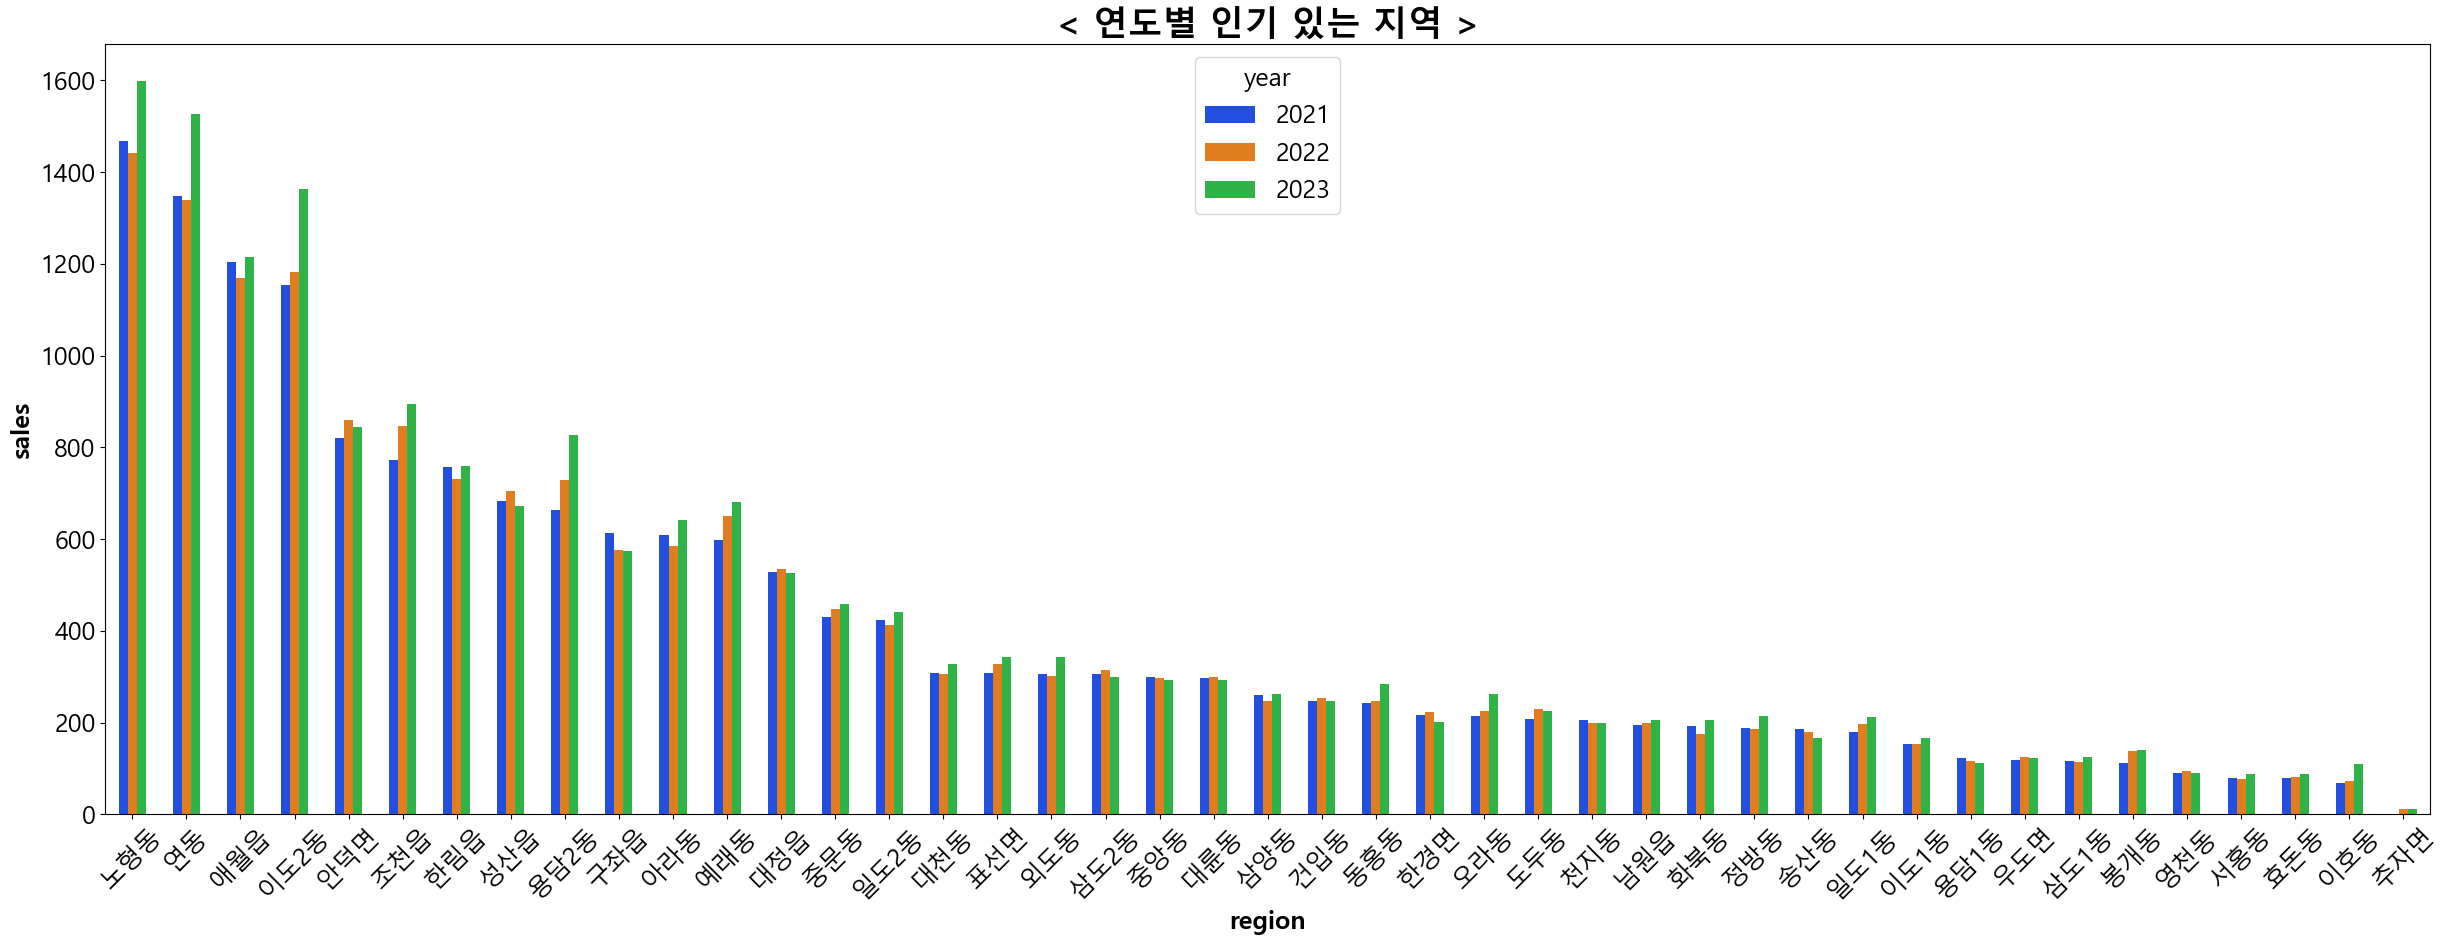

In [256]:
plt.rcParams['figure.figsize'] = (30, 10)
plt.rc("font", family = "Malgun Gothic", size=18, style="normal")
plt.title("< 연도별 인기 있는 지역 >", fontsize=25, weight='bold')
plt.xlabel('sr', fontsize=18, weight='bold')
plt.ylabel('name', fontsize=18, weight='bold')
plt.xticks(rotation=45)

sns.barplot(
    x="region", 
    y="sales", 
    hue="year",
    data=df,
    width=0.5,
    palette="bright"
)

In [315]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  MLSFC_NM AS type,
  ROUND(SUM(ALL_SALES_PRICE_RATE)) AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
GROUP BY
  1,2
ORDER BY
  3 DESC

'''

In [316]:
df = client.query(sql).to_dataframe()
df

,year,type,sales
0,2023,한식,12551.0
1,2021,한식,12387.0
2,2022,한식,11824.0
3,2021,아시아음식,1249.0
4,2021,간식,1193.0
5,2023,간식,1066.0
6,2023,아시아음식,1065.0
7,2022,아시아음식,988.0
8,2022,간식,945.0
9,2021,패스트푸드,788.0


<Axes: title={'center': '< 21~23 매출 높은 음식점 업종  >'}, xlabel='type', ylabel='sales'>

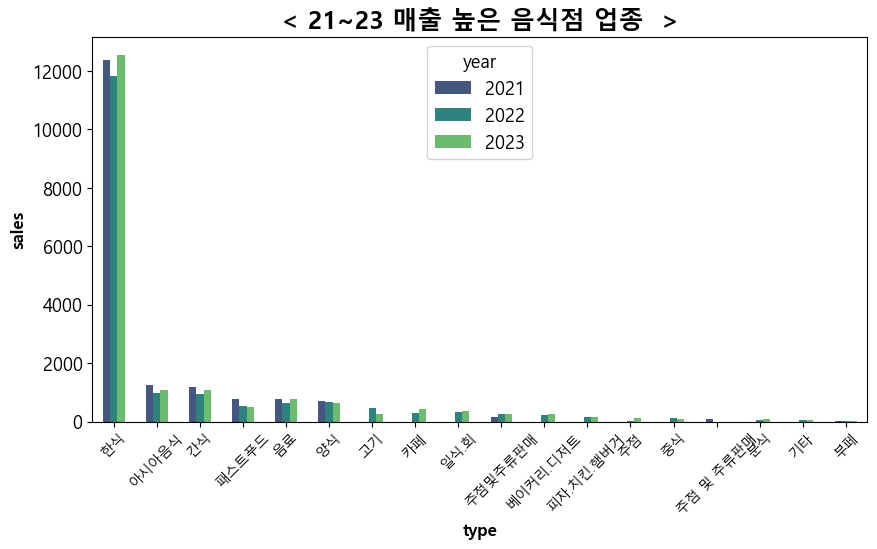

In [319]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21~23 매출 높은 음식점 업종  >", fontsize=18, weight='bold')
plt.xlabel('sr', fontsize=12, weight='bold')
plt.ylabel('name', fontsize=12, weight='bold')
plt.xticks(rotation=45, fontsize=10)

sns.barplot(
    x="type", 
    y="sales", 
    hue="year",
    data=df,
    width=0.5,
    palette="viridis"
)

In [346]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  MLSFC_NM AS type,
  ROUND(SUM(ALL_SALES_PRICE_RATE),2) AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_21*`
GROUP BY
  1,2
ORDER BY
  3 DESC

'''

In [347]:
df = client.query(sql).to_dataframe()
df

,year,type,sales
0,2021,한식,12386.51
1,2021,아시아음식,1249.07
2,2021,간식,1193.01
3,2021,패스트푸드,787.95
4,2021,음료,782.73
5,2021,양식,709.35
6,2021,주점및주류판매,151.76
7,2021,주점 및 주류판매,99.64
8,2021,부페,14.65


<Axes: title={'center': '< 23년도 방문율 높은 음식점 업종 순위 >'}, xlabel='type', ylabel='sales'>

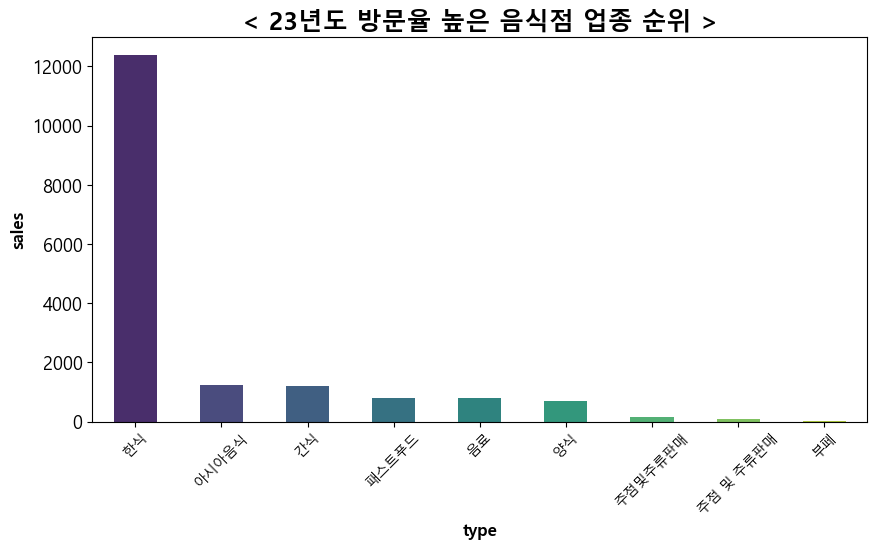

In [348]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 23년도 방문율 높은 음식점 업종 순위 >", fontsize=18, weight='bold')
plt.xlabel('sr', fontsize=12, weight='bold')
plt.ylabel('name', fontsize=12, weight='bold')
plt.xticks(rotation=45, fontsize=10)

sns.barplot(
    x="type", 
    y="sales", 
    data=df,
    width=0.5,
    palette="viridis"
)

### 21~23 식당 업종 선호도

In [12]:

sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  MLSFC_NM AS type,
  COUNT(*) AS cnt
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
GROUP BY
  2,1
ORDER BY
  1,3 DESC
'''

In [13]:
df = client.query(sql).to_dataframe()
df

,year,type,cnt
0,2021,한식,120442
1,2021,간식,10845
2,2021,음료,9418
3,2021,아시아음식,9127
4,2021,패스트푸드,9104
5,2021,양식,5163
6,2021,주점및주류판매,2540
7,2021,주점 및 주류판매,1229
8,2021,부페,140
9,2022,한식,111620


In [284]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  COUNT(ALL_SALES_PRICE_RATE) AS cnt
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
GROUP BY
  1,2
ORDER BY
  1,2
'''

In [285]:
df = client.query(sql).to_dataframe()
df

,year,month,cnt
0,2021,1,12757
1,2021,2,13295
2,2021,3,13733
3,2021,4,13941
4,2021,5,14103
5,2021,6,14055
6,2021,7,14272
7,2021,8,14122
8,2021,9,14117
9,2021,10,14514


In [258]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  SUM(ALL_SALES_PRICE_RATE) AS sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
GROUP BY
  1,2
ORDER BY
  1,2
'''

In [259]:
df = client.query(sql).to_dataframe()
df

,year,month,sales
0,2021,1,1845.17
1,2021,2,1633.70
2,2021,3,1433.98
3,2021,4,1620.41
4,2021,5,1443.86
5,2021,6,1442.43
6,2021,7,1104.77
7,2021,8,967.80
8,2021,9,1367.19
9,2021,10,1449.95


<Axes: title={'center': '< 21~23년 월별 매출비율 변화 >'}, xlabel='month', ylabel='sales'>

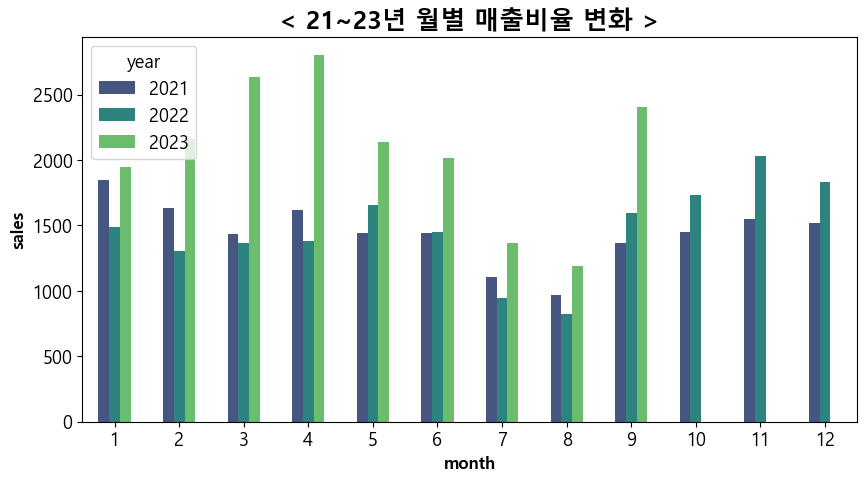

In [262]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21~23년 월별 매출비율 변화 >", fontsize=18, weight='bold')
plt.xlabel('sr', fontsize=12, weight='bold')
plt.ylabel('name', fontsize=12, weight='bold')

sns.barplot(
    data=df,
    x="month", 
    y="sales", 
    hue='year',
    width=0.5,
    palette="viridis"
)

In [298]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  SUM(JJINHBT_SALES_PRICE_RATE) AS local_sales

FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
GROUP BY
  1,2
ORDER BY
  1,2

'''

In [299]:
df = client.query(sql).to_dataframe()

In [301]:
# plt.rcParams['figure.figsize'] = (10, 5)
# plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
# plt.title("< 21~23년 월별 외지인 매출 변화 >", fontsize=18, weight='bold')
# plt.xlabel('sr', fontsize=12, weight='bold')
# plt.ylabel('name', fontsize=12, weight='bold')

# sns.barplot(
#     data=df,
#     x="month", 
#     y="local_sales", 
#     hue='year',
#     width=0.5,
#     palette="rocket"
# )

In [290]:
sql= '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  SUM(OTSD_SALES_PRICE_RATE) AS tour_sales

FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
GROUP BY
  1,2
ORDER BY
  1,2
'''

In [291]:
df = client.query(sql).to_dataframe()

<Axes: title={'center': '< 21~23년 월별 외지인 매출 변화 >'}, xlabel='month', ylabel='tour_sales'>

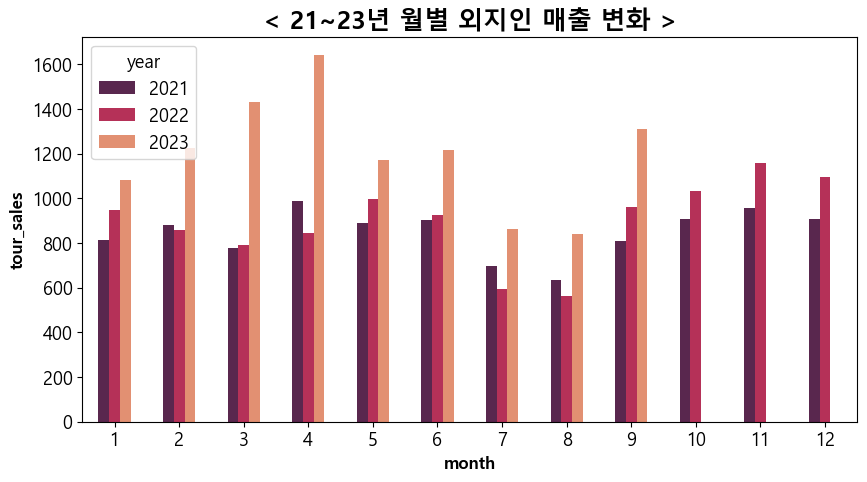

In [296]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21~23년 월별 외지인 매출 변화 >", fontsize=18, weight='bold')
plt.xlabel('sr', fontsize=12, weight='bold')
plt.ylabel('name', fontsize=12, weight='bold')

sns.barplot(
    data=df,
    x="month", 
    y="tour_sales", 
    hue='year',
    width=0.5,
    palette="rocket"
)

###  중복되는 업종 통일한 연도별 방문율 

###  21년 월별 음식점 업종별 방문율

In [383]:
sql = '''
SELECT
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  SUM(CASE WHEN MLSFC_NM IN ('간식','베이커리.디저트', '카페', '음료') THEN 1 ELSE 0 END) AS desserts,
  SUM(CASE WHEN MLSFC_NM IN ('피자.치킨.햄버거', '패스트푸드') THEN 1 ELSE 0 END) AS fastfood,
  SUM(CASE WHEN MLSFC_NM IN ('양식') THEN 1 ELSE 0 END) AS pasta,
  SUM(CASE WHEN MLSFC_NM IN ('아시아음식', '일식.회', '중식') THEN 1 ELSE 0 END) AS asiafood,
  SUM(CASE WHEN MLSFC_NM IN ('한식','고기','분식') THEN 1 ELSE 0 END) AS koreafood,
  SUM(CASE WHEN MLSFC_NM IN ('주점및주류판매','주점', '주점 및 주류판매') THEN 1 ELSE 0 END) AS alcohol,
  SUM(CASE WHEN MLSFC_NM IN ('기타','부페') THEN 1 ELSE 0 END) AS etc
FROM 
  `vivid-gantry-404708.project_011.card_transaction_21*`
GROUP BY
  1
ORDER BY
  1
'''

In [384]:
df = client.query(sql).to_dataframe()
df

,month,desserts,fastfood,pasta,asiafood,koreafood,alcohol,etc
0,1,1515,728,367,697,9161,279,10
1,2,1585,735,392,722,9540,310,11
2,3,1614,738,409,744,9895,321,12
3,4,1639,742,422,758,10048,319,13
4,5,1649,744,441,758,10185,315,11
5,6,1683,756,438,762,10097,306,13
6,7,1713,769,453,768,10239,318,12
7,8,1730,769,439,768,10093,312,11
8,9,1738,765,444,773,10077,309,11
9,10,1789,779,457,790,10366,321,12


<Axes: xlabel='month', ylabel='desserts'>

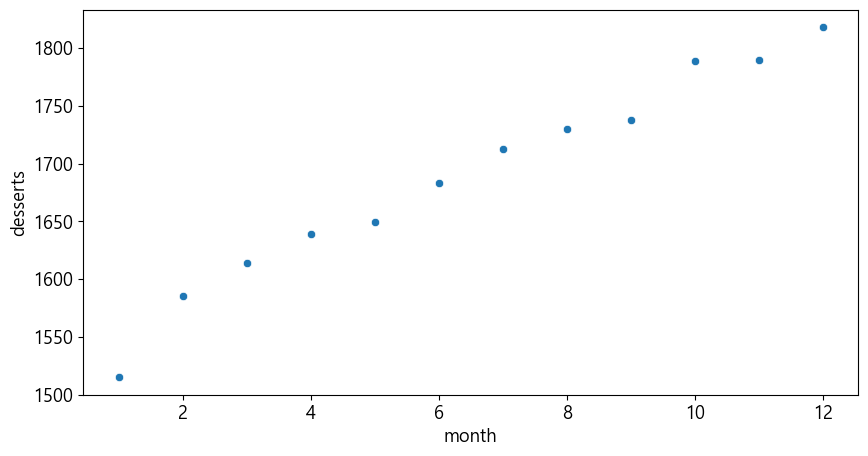

In [387]:
sns.scatterplot(
    x="month",
    y="desserts",
    data=df
)

###### 그래프로 표현..?

###  21~23년 월별 음식점 업종별 방문율

In [138]:
sql = '''
SELECT
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  SUM(CASE WHEN MLSFC_NM IN ('간식','베이커리.디저트', '카페', '음료') THEN 1 ELSE 0 END) AS desserts,
  SUM(CASE WHEN MLSFC_NM IN ('피자.치킨.햄버거', '패스트푸드') THEN 1 ELSE 0 END) AS fastfood,
  SUM(CASE WHEN MLSFC_NM IN ('양식') THEN 1 ELSE 0 END) AS pasta,
  SUM(CASE WHEN MLSFC_NM IN ('아시아음식', '일식.회', '중식') THEN 1 ELSE 0 END) AS asiafood,
  SUM(CASE WHEN MLSFC_NM IN ('한식','고기','분식') THEN 1 ELSE 0 END) AS koreafood,
  SUM(CASE WHEN MLSFC_NM IN ('주점및주류판매','주점', '주점 및 주류판매') THEN 1 ELSE 0 END) AS alcohol,
  SUM(CASE WHEN MLSFC_NM IN ('기타','부페') THEN 1 ELSE 0 END) AS etc
FROM 
  `vivid-gantry-404708.project_011.card_transaction_*`
GROUP BY
  1
ORDER BY
  1
'''

In [139]:
df = client.query(sql).to_dataframe()
df

,month,desserts,fastfood,pasta,asiafood,koreafood,alcohol,etc
0,1,5389,2319,1219,2436,29450,952,78
1,2,5441,2318,1243,2458,29707,963,75
2,3,5525,2317,1267,2490,30267,1011,77
3,4,5558,2324,1297,2509,30486,1010,73
4,5,5568,2310,1321,2508,30630,1000,74
5,6,5562,2304,1308,2499,30373,996,73
6,7,5556,2309,1317,2497,30281,994,72
7,8,5536,2277,1300,2496,30045,976,70
8,9,5517,2256,1290,2466,29846,973,71
9,10,3414,1477,849,1518,19649,627,21


### 21년 업종별 매출비율 변화

In [144]:
sql = '''
SELECT
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  SUM(ALL_SALES_PRICE_RATE) AS sr,
  MLSFC_NM AS type
FROM
  `vivid-gantry-404708.project_011.card_transaction_21*`
GROUP BY
  1,3
ORDER BY
  1,2 DESC
'''

In [145]:
df = client.query(sql).to_dataframe()
df

,year,sr,type
0,2021,12386.51,한식
1,2021,1249.07,아시아음식
2,2021,1193.01,간식
3,2021,787.95,패스트푸드
4,2021,782.73,음료
5,2021,709.35,양식
6,2021,151.76,주점및주류판매
7,2021,99.64,주점 및 주류판매
8,2021,14.65,부페


### 22년 월별, 업종별 매출 변화

In [84]:

sql = '''
SELECT
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  SUM(ALL_SALES_PRICE_RATE) AS sr,
  MLSFC_NM AS type
FROM
  `vivid-gantry-404708.project_011.card_transaction_22*`
GROUP BY
  1,3
ORDER BY
  1,2 DESC
'''

In [85]:
df = client.query(sql).to_dataframe()
df

,month,sr,type
0,1,1056.36,한식
1,1,112.15,간식
2,1,105.59,아시아음식
3,1,71.00,음료
4,1,64.54,패스트푸드
...,...,...,...
99,12,53.96,양식
100,12,28.89,기타
101,12,27.09,분식
102,12,25.83,주점및주류판매


### 23년 월별, 업종별 매출 변화

In [88]:

sql = '''
SELECT
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  SUM(ALL_SALES_PRICE_RATE) AS sr,
  MLSFC_NM AS type
FROM
  `vivid-gantry-404708.project_011.card_transaction_23*`
GROUP BY
  1,3
ORDER BY
  1,2 DESC
'''

In [89]:
df = client.query(sql).to_dataframe()
df

,month,sr,type
0,1,1304.33,한식
1,1,113.83,아시아음식
2,1,105.34,간식
3,1,75.74,음료
4,1,64.35,양식
...,...,...,...
148,9,17.60,주점
149,9,11.32,분식
150,9,11.03,중식
151,9,8.18,기타


[Text(0.5, 1.0, ' 23년 월별 업종별 매출 순위(전 월 대비)')]

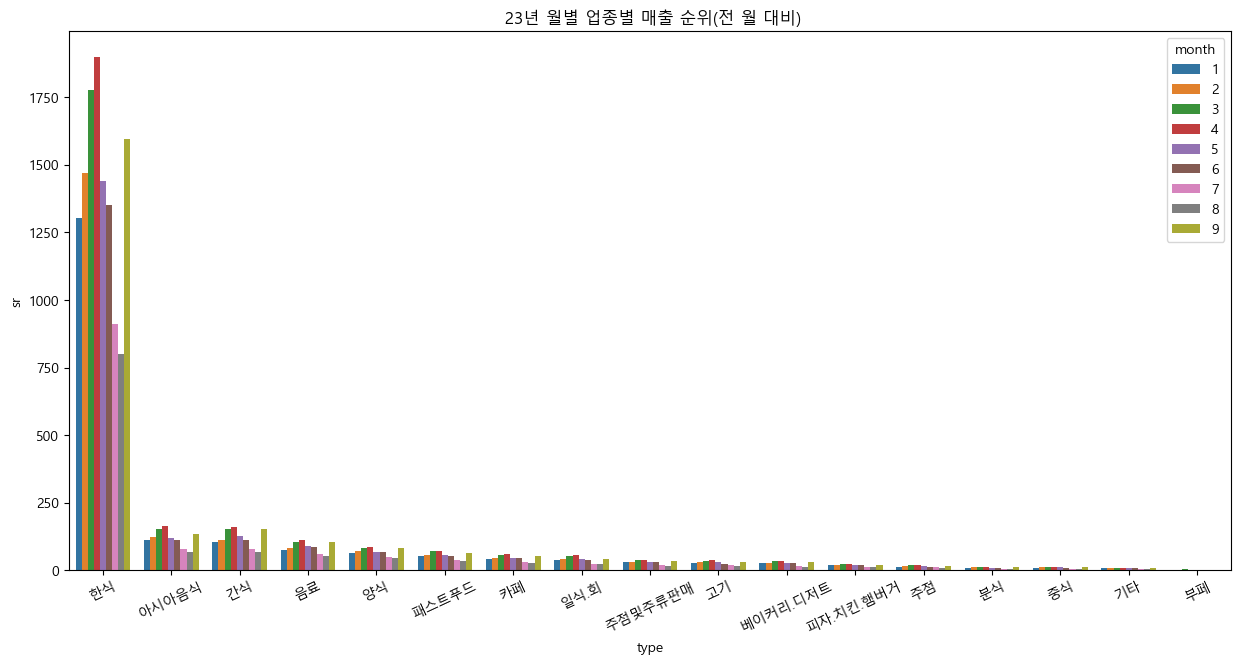

In [95]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.rc("font", family = "Malgun Gothic", size=10)
plt.xticks(rotation=25)
plt.rcParams['axes.unicode_minus'] = False

sns.barplot(
    x="type", 
    y="sr", 
    hue="month",
    data=df,
    width=0.8
).set(
    title=" 23년 월별 업종별 매출 순위(전 월 대비)"
)

### 연도별 '패스트푸드' 업종 매출비율 변화

In [98]:

sql = '''
SELECT
  MLSFC_NM AS type,
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  ROUND(SUM(ALL_SALES_PRICE_RATE),2) AS sr
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE 
  MLSFC_NM IN ('패스트푸드','피자.치킨.햄버거')
GROUP BY
  2,1
ORDER BY 
  2,3 DESC
'''

In [99]:
df = client.query(sql).to_dataframe()
df

,type,year,sr
0,패스트푸드,2021,787.95
1,패스트푸드,2022,529.53
2,피자.치킨.햄버거,2022,162.38
3,패스트푸드,2023,504.01
4,피자.치킨.햄버거,2023,169.00


### 연도별 '한식' 업종 매출 비율 변화

In [15]:
sql = '''
SELECT
  MLSFC_NM AS type,
  EXTRACT(YEAR FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS year,
  ROUND(SUM(ALL_SALES_PRICE_RATE),2) AS sr
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE 
  MLSFC_NM IN ('한식')
GROUP BY
  2,1
ORDER BY 
  2
'''

In [16]:
df = client.query(sql).to_dataframe()
df

,type,year,sr
0,한식,2021,12386.51
1,한식,2022,11824.41
2,한식,2023,12551.22


[Text(0.5, 1.0, '연도별 한식 음식점 매출비율 변화')]

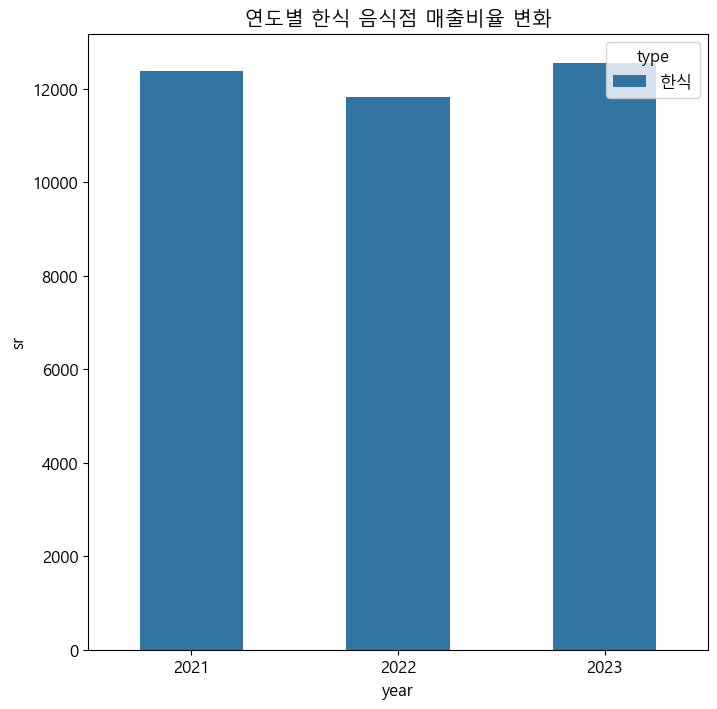

In [23]:
plt.rcParams['figure.figsize'] = (8, 8)
plt.rc("font", family = "Malgun Gothic", size=12, style="oblique")

sns.barplot(
    x="year", 
    y="sr", 
    hue="type",
    data=df,
    width=0.5
).set(
    title="연도별 한식 음식점 매출비율 변화"
)

# 음식 종류별 방문율 순위

In [108]:

sql = '''
SELECT
  SCLAS_NM AS menu,
  COUNT(*) AS cnt
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
GROUP BY
  1
ORDER BY 
  2 DESC
'''

In [109]:
df = client.query(sql).to_dataframe()
df

,menu,cnt
0,가정식,132336
1,단품요리 전문,122712
2,커피,36651
3,치킨,21076
4,베이커리,13953
...,...,...
74,백숙,39
75,순대국,39
76,샌드위치,35
77,핫도그,24


In [ ]:
 ## 탑 20위 정도?

## 21~23년까지 월별 '회' 식당 방문율 변화

In [24]:

sql = '''
SELECT
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  COUNT(*) AS cnt,
  SCLAS_NM AS menu
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE
  SCLAS_NM = '회'
GROUP BY
  1,3
ORDER BY 
  1
'''


In [25]:
df = client.query(sql).to_dataframe()
df

,month,cnt,menu
0,1,553,회
1,2,540,회
2,3,537,회
3,4,547,회
4,5,546,회
5,6,539,회
6,7,526,회
7,8,520,회
8,9,509,회
9,10,465,회


[Text(0.5, 1.0, '월별 회 식당 방문율 변화')]

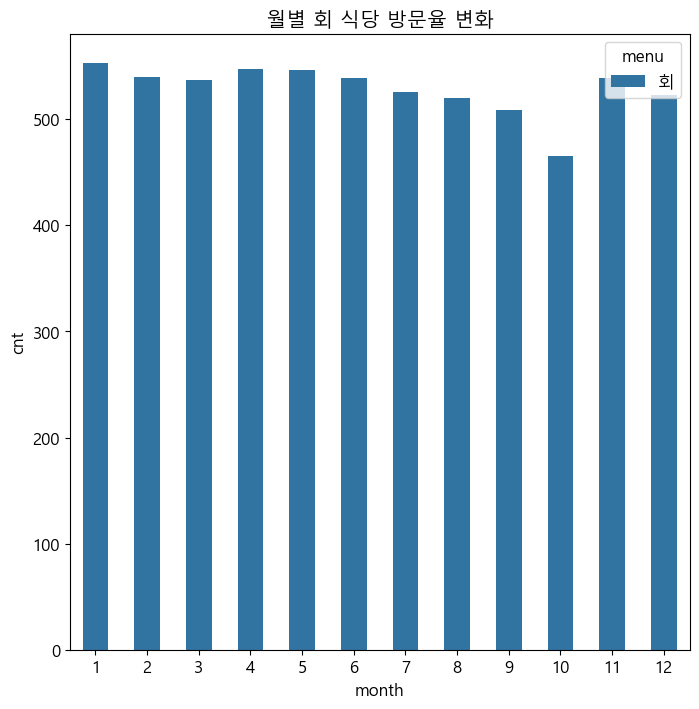

In [32]:
sns.barplot(
    x="month", 
    y="cnt", 
    hue="menu",
    data=df,
    width=0.5
).set(
    title="월별 회 식당 방문율 변화"
)

## 21~23년까지 월별 '회' 식당 매출비율 변화

In [118]:
sql = '''
SELECT
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  ROUND(SUM(ALL_SALES_PRICE_RATE),2) AS sr,
  SCLAS_NM AS menu
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE
  SCLAS_NM = '회'
GROUP BY
  1,3
ORDER BY 
  2 DESC
'''


In [119]:
df = client.query(sql).to_dataframe()
df

,month,sr,menu
0,4,165.02,회
1,11,162.49,회
2,3,145.30,회
3,5,144.49,회
4,9,143.21,회
5,12,140.46,회
6,6,133.31,회
7,1,131.48,회
8,2,126.19,회
9,10,115.19,회


[Text(0.5, 1.0, '월별 회 식당 매출 변화')]

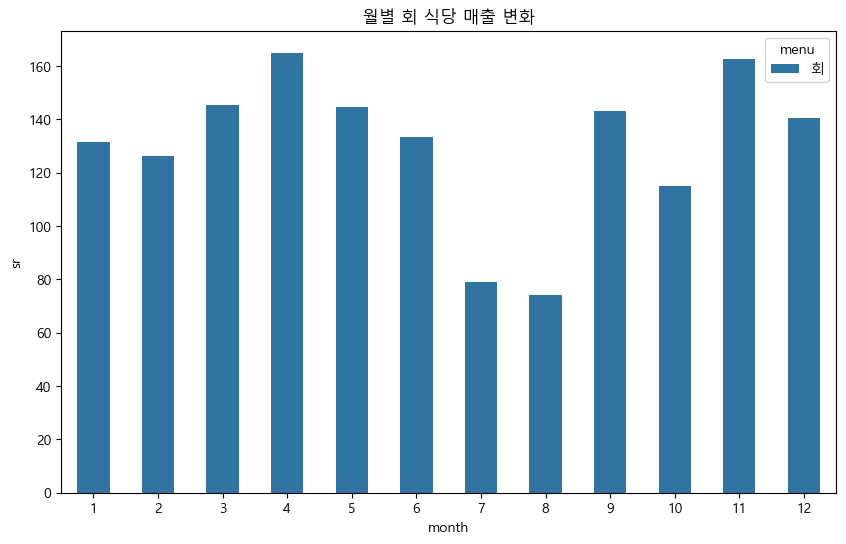

In [125]:
plt.rcParams['figure.figsize'] = (10, 6)

sns.barplot(
    x="month", 
    y="sr", 
    hue='menu',
    data=df,
    width=0.5
).set(
    title="월별 회 식당 매출 변화"
)

## 21~23년까지 월별 '베이커리' 매출비율 변화

In [192]:
sql = '''
SELECT
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  ROUND(SUM(ALL_SALES_PRICE_RATE),2) AS sales,
  SCLAS_NM AS menu
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE
  SCLAS_NM = '베이커리'
GROUP BY
  1,3
ORDER BY 
  2 DESC,1
'''


In [193]:
df = client.query(sql).to_dataframe()
df

,month,sales,menu
0,9,283.98,베이커리
1,4,268.08,베이커리
2,3,266.74,베이커리
3,1,266.47,베이커리
4,5,240.66,베이커리
5,2,240.46,베이커리
6,6,221.93,베이커리
7,12,166.74,베이커리
8,11,157.52,베이커리
9,7,150.30,베이커리


<Axes: title={'center': '< 21~23년 월별 베이커리 매출비율 변화 >'}, xlabel='month', ylabel='sales'>

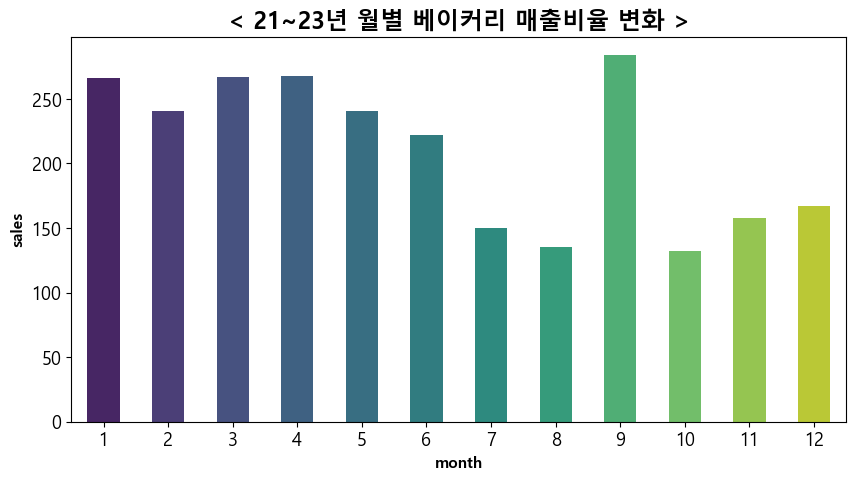

In [199]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21~23년 월별 베이커리 매출비율 변화 >", fontsize=17, weight='bold')
plt.xlabel('sales', fontsize=11, weight='bold')
plt.ylabel('name', fontsize=11, weight='bold')

sns.barplot(
    x="month", 
    y="sales", 
    data=df,
    width=0.5,
    palette="viridis"
    
)

In [200]:
sql = '''
SELECT
  EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) AS month,
  count(*) as cnt,
  SCLAS_NM AS menu
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE
  SCLAS_NM = '베이커리'
GROUP BY
  1,3
ORDER BY 
  2 DESC,1
'''

In [201]:
df = client.query(sql).to_dataframe()
df

,month,cnt,menu
0,3,1286,베이커리
1,5,1279,베이커리
2,4,1277,베이커리
3,6,1272,베이커리
4,1,1268,베이커리
5,2,1268,베이커리
6,9,1267,베이커리
7,8,1264,베이커리
8,7,1261,베이커리
9,11,840,베이커리


<Axes: title={'center': '< 21~23년 월별 베이커리 방문율 변화 >'}, xlabel='month', ylabel='cnt'>

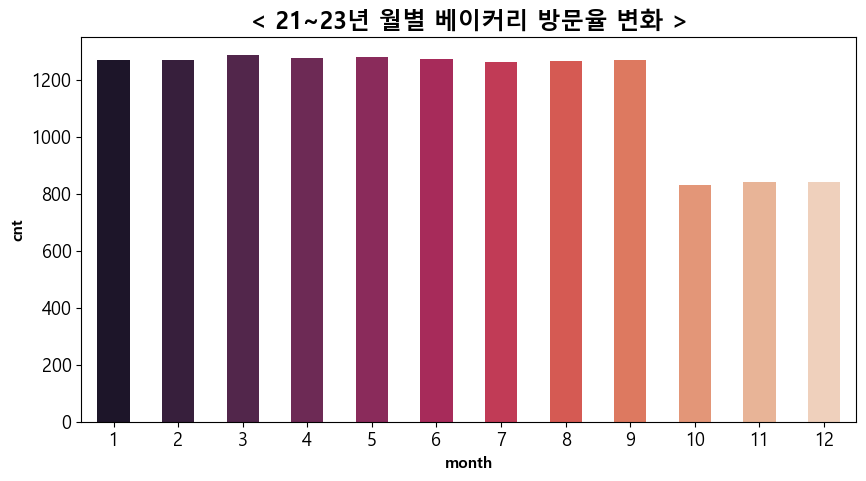

In [204]:
plt.rcParams['figure.figsize'] = (10, 5)
plt.rc("font", family = "Malgun Gothic", size=13, style="normal")
plt.title("< 21~23년 월별 베이커리 방문율 변화 >", fontsize=17, weight='bold')
plt.xlabel('sales', fontsize=11, weight='bold')
plt.ylabel('name', fontsize=11, weight='bold')

sns.barplot(
    x="month", 
    y="cnt", 
    data=df,
    width=0.5,
    palette="rocket"
    
)

# 소비자별 음식점 & 업종 선호도

### 23년 5월 탑20 음식점의 현지인 & 외지인 기준 매출금액 비율 차이

In [371]:

sql = '''
SELECT
  CMPNM_NM AS name,
  ALL_SALES_PRICE_RATE AS sales,
  JJINHBT_SALES_PRICE_RATE AS local_sales,
  OTSD_SALES_PRICE_RATE AS tour_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_23*`
GROUP BY 
  2,1,3,4
ORDER BY 
  2 DESC
LIMIT
  10
'''

In [372]:
df = client.query(sql).to_dataframe()
df

,name,sales,local_sales,tour_sales
0,(주)파리크라상파리바게뜨제주공항탑승점,16.24,13.45,15.18
1,(주)오설록 제주점,14.39,5.36,14.26
2,파리바게뜨제주공항렌트카하우스점,13.74,6.12,14.08
3,파리바게뜨제주공항렌트카하우스점,13.65,7.23,13.51
4,(주)파리크라상파리바게뜨 제주공항점,13.63,9.52,12.96
5,(주)오설록 제주점,12.55,6.01,12.82
6,(주)오설록 제주점,12.29,4.72,12.18
7,(주)오설록 제주점,12.13,3.42,12.15
8,(주)파리크라상파리바게뜨제주공항탑승점,11.83,9.11,11.74
9,(주)오설록 제주점,11.68,5.59,11.61


### 23년 6월 기준 외지인한테 인기 많았던 음식점 탑20

In [367]:

sql = '''
SELECT
  CMPNM_NM AS name,
  SCLAS_NM AS menu,
  OTSD_SALES_PRICE_RATE AS tour_sales
FROM
  `vivid-gantry-404708.project_011.card_transaction_2309`
ORDER BY
  3 DESC
LIMIT
  15
'''

In [368]:
df = client.query(sql).to_dataframe()
df

,name,menu,tour_sales
0,(주)파리크라상파리바게뜨제주공항탑승점,베이커리,15.18
1,(주)오설록 제주점,차,14.26
2,(주)파리크라상파리바게뜨 제주공항점,베이커리,12.96
3,파리바게뜨제주공항렌트카하우스점,베이커리,11.21
4,런던베이글뮤지엄 제주,베이커리,7.64
5,우진해장국,가정식,6.81
6,숙성도 중문점,가정식,6.70
7,주식회사 토스카나,양식,6.17
8,숙성도 함덕점,돼지고기,5.06
9,한화호텔앤드리조트(주)제주지점,구내식당/푸드코트,5.02


###

### 23년 6월 기준 현지인한테 인기 많았던 음식점 탑20

In [156]:

sql = '''
SELECT
  RANK_CO AS rank,
  CMPNM_NM AS name,
  MLSFC_NM AS type,
  SCLAS_NM AS menu,
  JJINHBT_SALES_PRICE_RATE AS local_spr,
  JJINHBT_SALES_CO_RATE AS local_scr
FROM
  `vivid-gantry-404708.project_011.card_transaction_2306`
ORDER BY
  5 DESC
LIMIT
  20
'''

In [157]:
df = client.query(sql).to_dataframe()
df

,rank,name,type,menu,local_spr,local_scr
0,15175,(유)아웃백스테이크하우스 제주아일랜드점,양식,패밀리 레스토랑,44.66,17.24
1,5,한국맥도날드(유)제주노형점,패스트푸드,햄버거,25.19,100.00
2,88,제주늘봄,한식,가정식,23.47,6.68
3,12699,안다미로늘봄,한식,단품요리 전문,22.24,4.29
4,226,씨제이푸드빌(주) 빕스 제주점,양식,패밀리 레스토랑,20.08,8.14
5,43,늘봄흑돼지,한식,돼지고기,19.97,12.59
6,13,한국맥도날드(유)제주시청점,패스트푸드,햄버거,17.32,76.17
7,2853,영복갈비제주본점,한식,갈비,16.10,7.31
8,14566,글래드호텔앤리조트(주)메종글래드제주,한식,가정식,15.20,0.78
9,15169,런던베이글뮤지엄 제주,한식,베이커리,14.54,13.54


### 23년 1월 - 외지인 기준 인기 디저트 가게 탑 20

In [158]:

sql = '''
SELECT
  CMPNM_NM AS name,
  OTSD_SALES_PRICE_RATE AS tour_spr
FROM
  `vivid-gantry-404708.project_011.card_transaction_23*`
WHERE 
  MLSFC_NM IN ('간식','베이커리.디저트', '카페', '음료') AND EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) = 01
GROUP BY
  1,2
ORDER BY
  2 DESC
LIMIT
  20
'''

In [159]:
df = client.query(sql).to_dataframe()
df

,name,tour_spr
0,(주)오설록 제주점,9.62
1,파리바게뜨제주공항렌트카하우스점,8.51
2,(주)파리크라상파리바게뜨제주공항탑승점,4.14
3,카페델문도,3.58
4,아베베베이커리,3.37
5,(주)파리크라상파리바게뜨 제주공항점,3.03
6,랜디스도넛 제주직영점,2.64
7,엔제리너스 제주공항T/O,2.07
8,오드랑베이커리,2.05
9,우무,1.78


### 23년 1월 - 현지인 기준 인기 디저트 가게 탑 20

In [160]:

sql = '''
SELECT	
  CMPNM_NM AS name,
  JJINHBT_SALES_PRICE_RATE AS local_spr
FROM
  `vivid-gantry-404708.project_011.card_transaction_23*`
WHERE 
  MLSFC_NM IN ('간식','베이커리.디저트', '카페', '음료') AND EXTRACT(MONTH FROM PARSE_DATE('%Y%m', CAST(ANALS_YM AS STRING))) = 01
GROUP BY
  1,2
ORDER BY
  2 DESC
LIMIT
  20
'''

In [161]:
df = client.query(sql).to_dataframe()
df

,name,local_spr
0,파리바게뜨 제주제스코본점,12.95
1,풀바셋제주아라DT점,12.14
2,주식회사 삼양상사,11.29
3,탐앤탐스커피제주시청점,7.30
4,폴 바셋 제주용담DT점,7.24
5,삼송빵집 신제주점,6.92
6,퀴즈노스 제주대병원점,6.91
7,오드랑베이커리,6.69
8,에스프레소 라운지,6.60
9,서문시청점,6.32


# 지역별 인기 스팟

### 동네별 매출비율 순위

In [173]:
sql = '''
SELECT
  ADSTRD_NM AS town,
  SIGNGU_NM AS city,
  ROUND(SUM(ALL_SALES_PRICE_RATE),2) AS sr
FROM
  `vivid-gantry-404708.project_011.card_transaction_2304`
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT 
  30

'''

In [174]:
df = client.query(sql).to_dataframe()
df

,town,city,sr
0,노형동,제주시,236.11
1,연동,제주시,234.41
2,이도2동,제주시,199.42
3,애월읍,제주시,174.69
4,조천읍,제주시,136.66
5,용담2동,제주시,127.19
6,안덕면,서귀포시,124.16
7,한림읍,제주시,111.08
8,예래동,서귀포시,104.91
9,성산읍,서귀포시,103.19


### 동네별 방문율 순위

In [175]:
sql = '''
SELECT
  ADSTRD_NM AS town,
  SIGNGU_NM AS city,
  COUNT(*) AS cnt
FROM
  `vivid-gantry-404708.project_011.card_transaction_2304`
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT 
  30
'''

In [176]:
df = client.query(sql).to_dataframe()
df

,town,city,cnt
0,이도2동,제주시,1267
1,연동,제주시,1220
2,노형동,제주시,1064
3,애월읍,제주시,806
4,한림읍,제주시,666
5,조천읍,제주시,634
6,구좌읍,제주시,615
7,성산읍,서귀포시,549
8,아라동,제주시,536
9,대정읍,서귀포시,499


### 동네별 회 음식점 매출비율 순위

In [373]:
sql='''
SELECT
  ADSTRD_NM AS town,
  SIGNGU_NM AS city,
  ROUND(SUM(ALL_SALES_PRICE_RATE),2) AS sr
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE 
  SCLAS_NM IN ('베이커리')
GROUP BY
  1,2
ORDER BY
  3 DESC
LIMIT
  30
'''

In [374]:
df = client.query(sql).to_dataframe()
df

,town,city,sr
0,용담2동,제주시,512.93
1,노형동,제주시,188.12
2,이도2동,제주시,173.39
3,조천읍,제주시,144.95
4,애월읍,제주시,139.21
5,연동,제주시,134.35
6,대정읍,서귀포시,118.89
7,아라동,제주시,106.45
8,일도1동,제주시,91.07
9,일도2동,제주시,81.36


In [ ]:
### 현지인 기준 동네별 한식 업종 매출비율 순위

In [379]:
sql='''
SELECT
  CMPNM_NM AS name,
  ADSTRD_NM AS town,
  SIGNGU_NM AS city,
  ROUND(SUM(JJINHBT_SALES_PRICE_RATE),2) AS local_sr
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE 
  MLSFC_NM IN ('한식')
GROUP BY
  1,2,3
ORDER BY
  4 DESC
LIMIT
  15
'''

In [380]:
df = client.query(sql).to_dataframe()
df

,name,town,city,local_sr
0,늘봄흑돼지,노형동,제주시,614.88
1,제주늘봄,노형동,제주시,612.31
2,태백산제주본점,이호동,제주시,432.51
3,주식회사 바스코,건입동,제주시,426.35
4,제주통큰장어,이도2동,제주시,399.91
5,푸주옥,오라동,제주시,389.97
6,돈풍년,아라동,제주시,364.49
7,푸주옥노형점,노형동,제주시,358.24
8,도남오거리도남점,이도2동,제주시,317.25
9,디앤,이도2동,제주시,296.19


### 외지인 기준 동네별 베이커리점 매출비율 순위

In [381]:
sql='''
SELECT
  CMPNM_NM AS name,
  ADSTRD_NM AS town,
  SIGNGU_NM AS city,
  ROUND(SUM(OTSD_SALES_PRICE_RATE),2) AS local_sr
FROM
  `vivid-gantry-404708.project_011.card_transaction_*`
WHERE 
  SCLAS_NM IN ('베이커리')
GROUP BY
  1,2,3
ORDER BY
  4 DESC
LIMIT
  20
'''

In [382]:
df = client.query(sql).to_dataframe()
df

,name,town,city,local_sr
0,(주)파리크라상파리바게뜨제주공항탑승점,용담2동,제주시,162.38
1,파리바게뜨제주공항렌트카하우스점,용담2동,제주시,147.50
2,(주)파리크라상파리바게뜨 제주공항점,용담2동,제주시,144.67
3,아베베베이커리,일도1동,제주시,53.57
4,(주)오드랑베이커리,조천읍,제주시,44.82
5,미쁜제과,대정읍,서귀포시,33.48
6,오드랑베이커리,조천읍,제주시,25.36
7,동문시장오복떡집,일도1동,제주시,25.33
8,애월빵공장앤카페,애월읍,제주시,24.46
9,쇠소깍빵명장,효돈동,서귀포시,23.07
